# Real Estate Price Prediction


In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_rows', 20)

In [3]:
df = pd.read_csv('data/data.csv')
df.sample(10)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
8575,Super built-up Area,Ready To Move,KR Puram,2 BHK,Sryam N,1120,2.0,2.0,36.00
7536,Super built-up Area,Ready To Move,Devarachikkanahalli,2 BHK,Ladenea,1130,2.0,2.0,36.00
1354,Super built-up Area,18-May,Devanahalli Int. Airport,2 BHK,NaN,1380,2.0,1.0,80.00
5933,Super built-up Area,Ready To Move,Thanisandra,3 BHK,NRncyrk,2127,3.0,2.0,135.00
3238,Super built-up Area,Ready To Move,Electronic City Phase II,2 BHK,Assha A,545,1.0,1.0,35.00
11086,Built-up Area,Ready To Move,Nagarbhavi,2 Bedroom,NaN,1250,3.0,0.0,170.00
10209,Super built-up Area,Ready To Move,Banagiri Nagar,3 BHK,NaN,1525,2.0,2.0,91.48
4942,Super built-up Area,Ready To Move,Haralur Road,2 BHK,NRowse,1464,2.0,2.0,56.00
5824,Super built-up Area,18-Dec,Whitefield,3 BHK,BSlasin,1600,3.0,2.0,82.00
12134,Super built-up Area,Ready To Move,Bellandur,3 BHK,Krala D,1690,2.0,2.0,116.00


In [4]:
df.shape

(13320, 9)

In [5]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [6]:
df.groupby('area_type')[['area_type']].agg('count')

,area_type
area_type,
Built-up Area,2418
Carpet Area,87
Plot Area,2025
Super built-up Area,8790


In [7]:
# df1 = df.drop(['area_type', 'availability', 'society','balcony'], axis='columns')  OR
df1 = df.drop(columns=['area_type', 'availability', 'society', 'balcony'])
df1

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [8]:
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [9]:
df2 = df1.dropna()
df2

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [10]:
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [11]:
df2['bhk'] = df2['size'].apply(lambda x: int(x.split()[0]))
df2

C:\Users\Krish\AppData\Local\Temp\ipykernel_16340\3115202510.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['bhk'] = df2['size'].apply(lambda x: int(x.split()[0]))


,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00,5
13316,Richards Town,4 BHK,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00,4


In [12]:
df2 = df2.drop(columns=['size'])
df2

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2
...,...,...,...,...,...
13315,Whitefield,3453,4.0,231.00,5
13316,Richards Town,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,1141,2.0,60.00,2
13318,Padmanabhanagar,4689,4.0,488.00,4


In [13]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

def sqft_to_num(x):
    token = x.split('-')
    if len(token) == 2:
        return ((float(token[0])+float(token[1]))/2)
    try:
        return float(x)
    except:
        return None
    
    
    
df2[~df2['total_sqft'].apply(is_float)].sample(20)

,location,total_sqft,bath,price,bhk
9434,Bannerghatta Road,1160 - 1315,2.0,49.490,2
1712,Singena Agrahara,1500Sq. Meter,3.0,95.000,3
10050,Old Madras Road,4500 - 5540,7.0,287.000,5
11764,Begur Road,2400 - 2600,6.0,122.500,4
7607,Bommenahalli,15Acres,3.0,217.000,3
11583,Bommanahalli,1215 - 1495,2.0,73.170,2
2310,Whitefield,361.33Sq. Yards,4.0,270.000,4
9299,Balagere,645 - 936,1.0,42.295,1
4884,Electronic City Phase II,888 - 1290,2.0,32.670,2
2716,JP Nagar,1300 - 1405,2.0,93.865,2


In [14]:
df3 = df2.copy()

df3['total_sqft'] = df3['total_sqft'].apply(sqft_to_num)
df3

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2
...,...,...,...,...,...
13315,Whitefield,3453.0,4.0,231.00,5
13316,Richards Town,3600.0,5.0,400.00,4
13317,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2
13318,Padmanabhanagar,4689.0,4.0,488.00,4


In [15]:
df3['price_per_sqft'] = df3['price']*100000 / df3['total_sqft']
df3

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...
13315,Whitefield,3453.0,4.0,231.00,5,6689.834926
13316,Richards Town,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4689.0,4.0,488.00,4,10407.336319


In [16]:
len(df3.location.unique())
# Will cause dimensionality curse in the case of one-hot encoding

1293

In [17]:
df3.location = df3.location.apply(lambda x:x.strip())


In [18]:
# To find the locations with fewer houses, to put them in a single group
location_stats = df3.groupby('location')['location'].agg('count').sort_values()
location_stats

location
6th Block Rajaji Nagar               1
6th Block Jayanagar                  1
3rd Stage Raja Rajeshwari Nagar      1
3rd Phase Iti Layout                 1
3rd Block HBR Layout                 1
                                  ... 
Thanisandra                        236
Kanakpura Road                     266
Electronic City                    304
Sarjapur  Road                     392
Whitefield                         535
Name: location, Length: 1293, dtype: int64

In [19]:
# Add threshold to location_count
df4 = df3.copy()
df4

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...
13315,Whitefield,3453.0,4.0,231.00,5,6689.834926
13316,Richards Town,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4689.0,4.0,488.00,4,10407.336319


In [20]:
location_less_than_10 = location_stats[location_stats<=10]
location_less_than_10

location
6th Block Rajaji Nagar              1
6th Block Jayanagar                 1
3rd Stage Raja Rajeshwari Nagar     1
3rd Phase Iti Layout                1
3rd Block HBR Layout                1
                                   ..
1st Block Koramangala              10
Dairy Circle                       10
Sadashiva Nagar                    10
BTM 1st Stage                      10
Nagappa Reddy Layout               10
Name: location, Length: 1052, dtype: int64

In [21]:
df4.location = df4.location.apply(lambda x: 'other' if x in location_less_than_10 else x)
df4

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...
13315,Whitefield,3453.0,4.0,231.00,5,6689.834926
13316,other,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4689.0,4.0,488.00,4,10407.336319


In [22]:
len(df4.location.unique())
# This helps in One hot encoding

242

In [23]:
df4.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [24]:
df4[df4.total_sqft/df4.bhk < 300].head()

,location,total_sqft,bath,price,bhk,price_per_sqft
9,other,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,1350.0,7.0,85.0,8,6296.296296
70,other,500.0,3.0,100.0,3,20000.000000


In [25]:
df5 = df4[~(df4.total_sqft/df4.bhk < 300)]
df5 # Removed all the outlying datapoints

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...
13315,Whitefield,3453.0,4.0,231.00,5,6689.834926
13316,other,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4689.0,4.0,488.00,4,10407.336319


In [26]:
df5.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [27]:
def remove_pps_outlier(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft > (m-st))&(subdf.price_per_sqft < (m+st))]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
        # print(key,'\n',subdf)
        
    return df_out

df6 = remove_pps_outlier(df5)
df6

,location,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,2850.0,4.0,428.00,4,15017.543860
1,1st Block Jayanagar,1630.0,3.0,194.00,3,11901.840491
2,1st Block Jayanagar,1875.0,2.0,235.00,3,12533.333333
3,1st Block Jayanagar,1200.0,2.0,130.00,3,10833.333333
4,1st Block Jayanagar,1235.0,2.0,148.00,2,11983.805668
...,...,...,...,...,...,...
10236,other,1353.0,2.0,110.00,2,8130.081301
10237,other,812.0,1.0,26.00,1,3201.970443
10238,other,1440.0,2.0,63.93,3,4439.583333
10239,other,1075.0,2.0,48.00,2,4465.116279


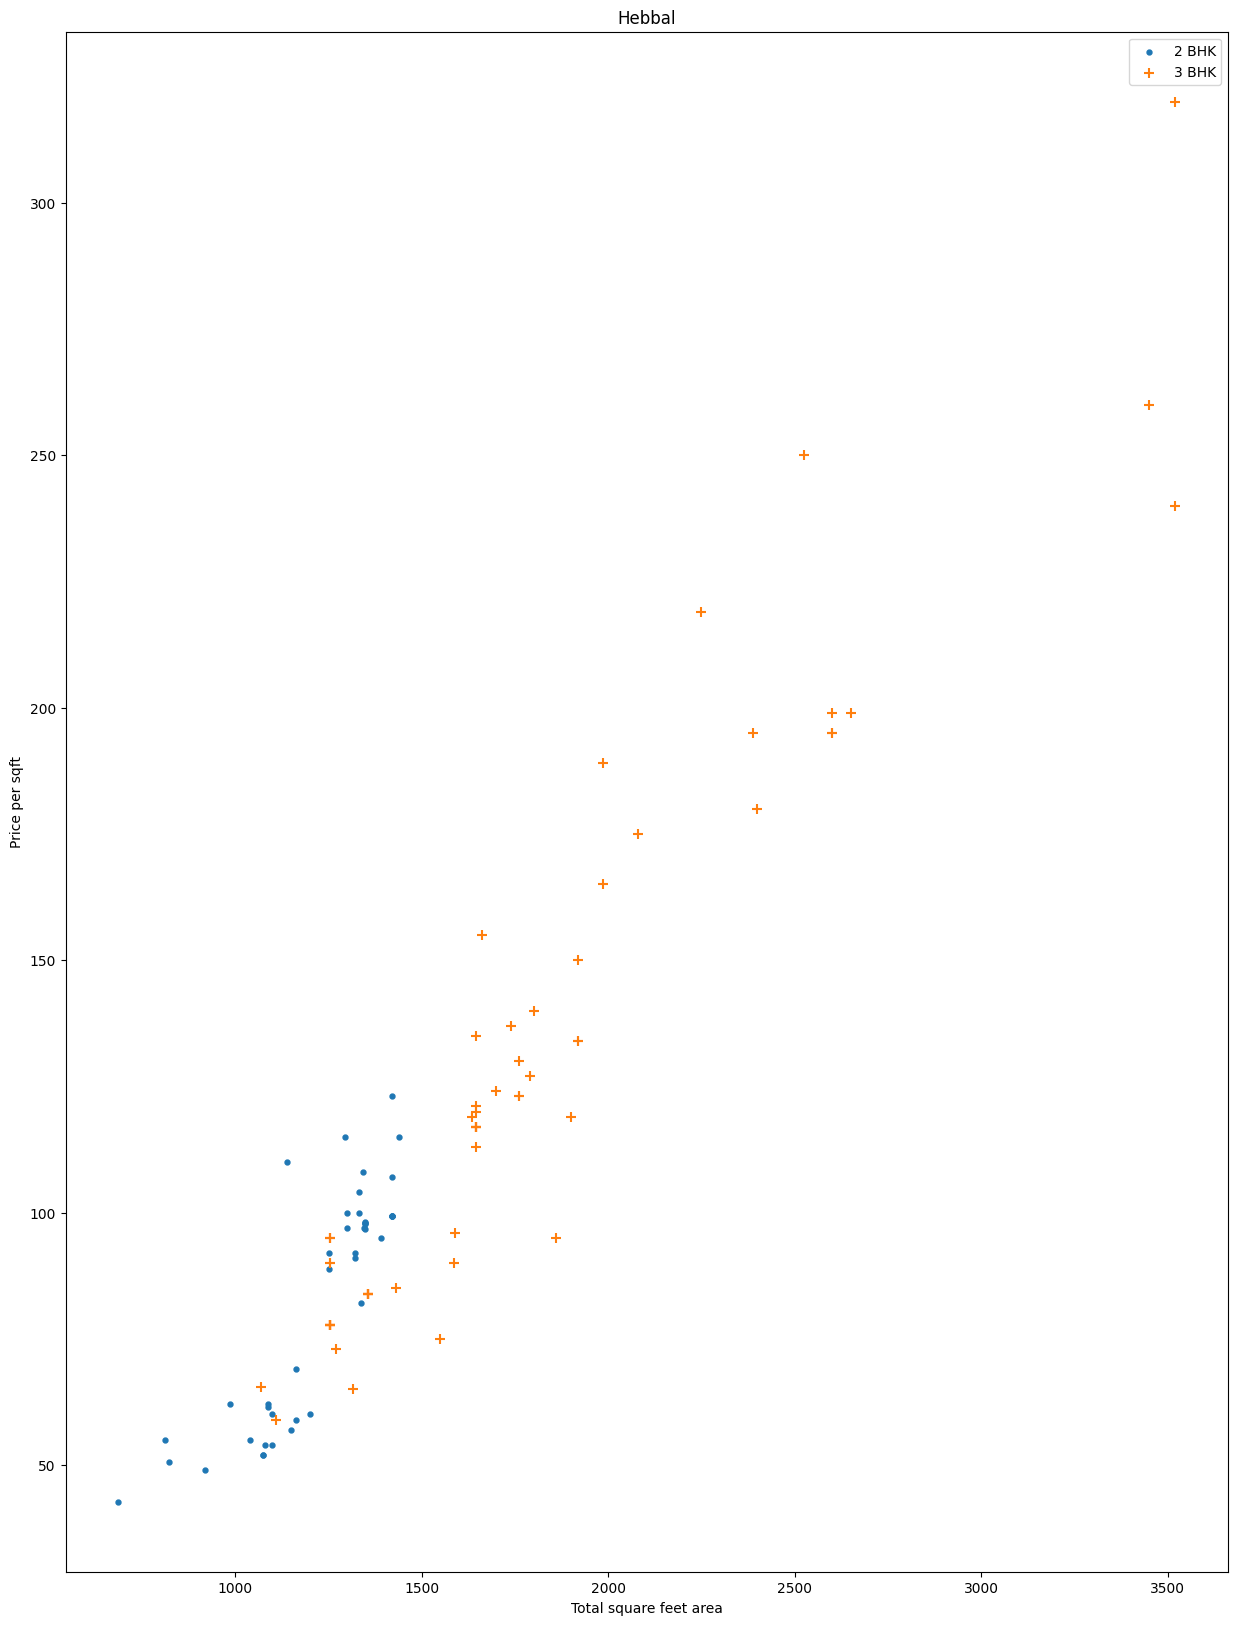

In [28]:
def plot_scatter_chart(df,location):
    bhk_2 = df[(df.location == location) & (df.bhk == 2)]
    bhk_3 = df[(df.location == location) & (df.bhk == 3)]
    matplotlib.rcParams['figure.figsize'] = (15,20)
    plt.scatter(bhk_2.total_sqft, bhk_2.price, marker='.', label='2 BHK', s=50)
    plt.scatter(bhk_3.total_sqft, bhk_3.price, marker='+', label='3 BHK', s=50)
    plt.xlabel('Total square feet area')
    plt.ylabel('Price per sqft')
    plt.title(location)
    plt.legend()
     

plot_scatter_chart(df6, 'Hebbal')

# To visualize that some apartments (of the same location) have more price for the same 
# sqft compared to that of a an apartment with higher BHK that itself


In [29]:
def remove_bhk_outlier(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean':np.mean(bhk_df.price_per_sqft),
                'std':np.std(bhk_df.price_per_sqft),
                'count':len(bhk_df)
            }
            
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
                
                
    return df.drop(exclude_indices)


df7 = remove_bhk_outlier(df6)
df7.shape
    

(7329, 6)

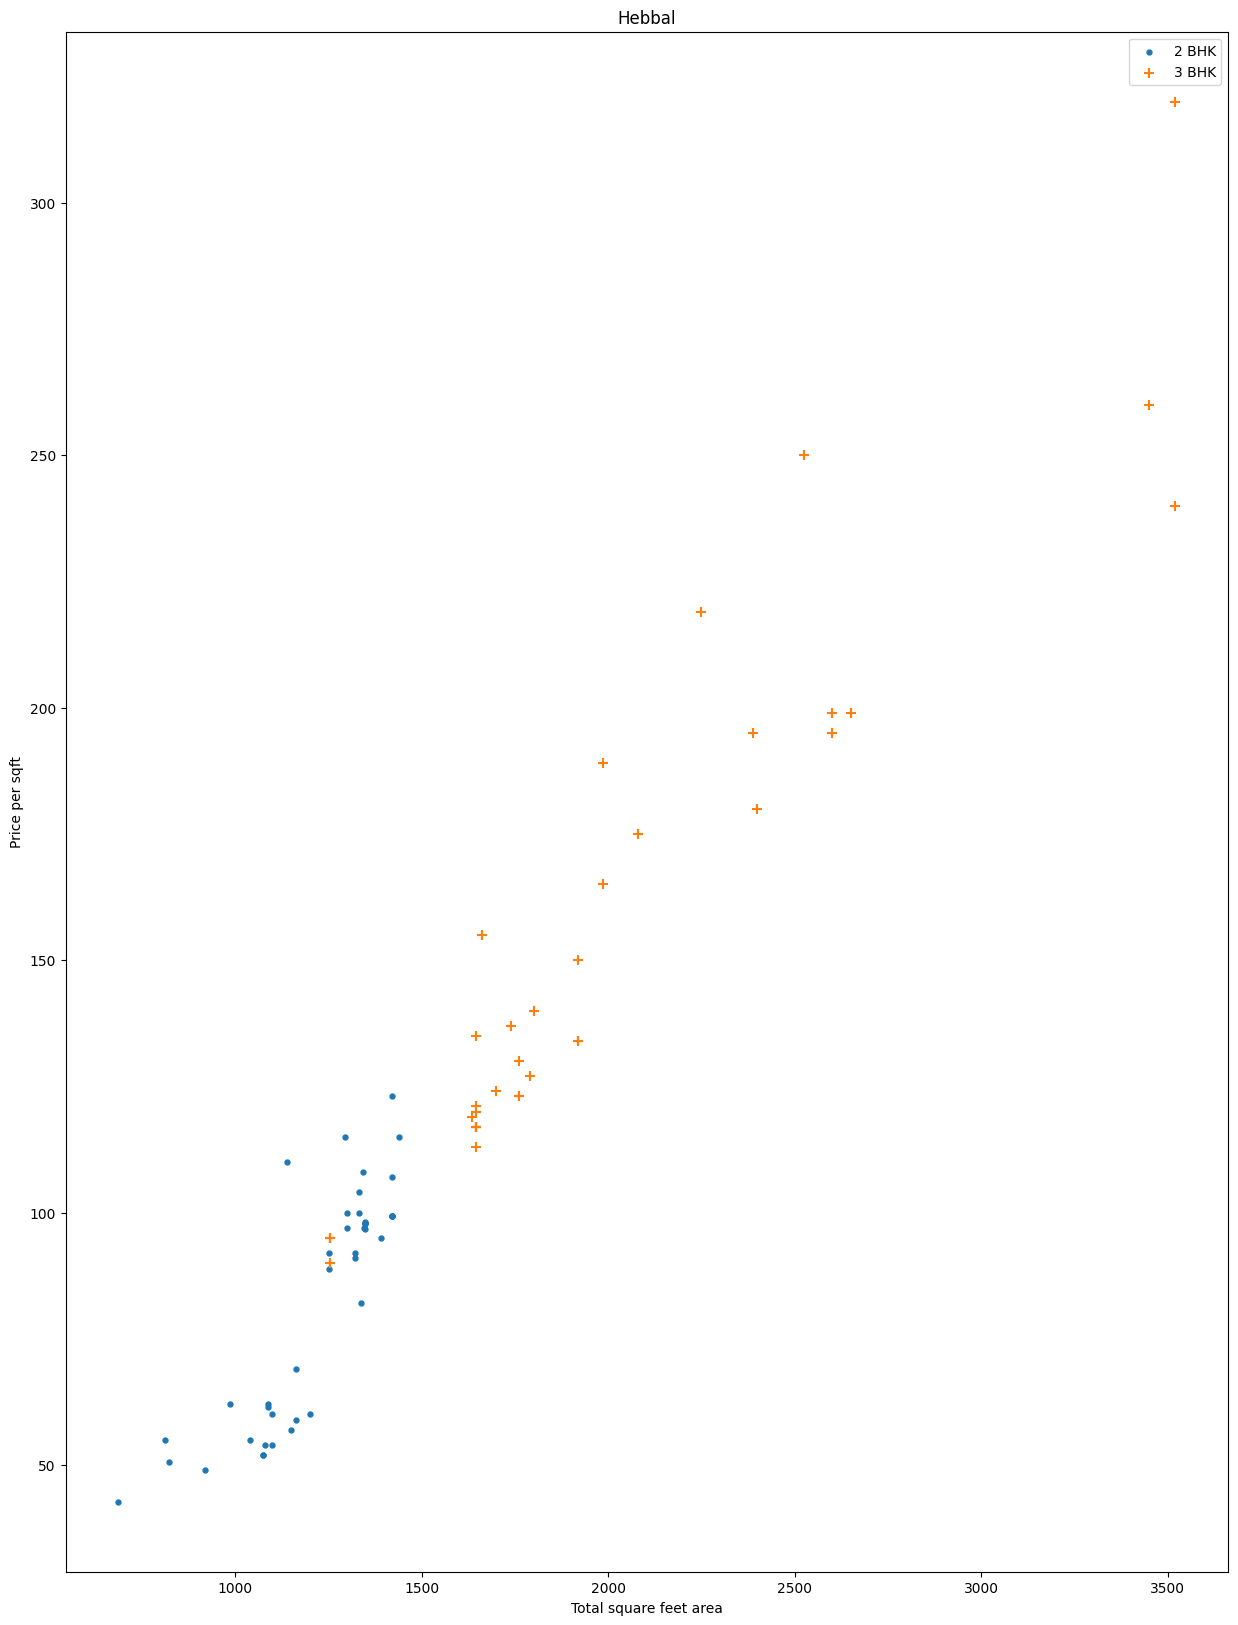

In [30]:
plot_scatter_chart(df7, 'Hebbal')
# Notice the difference after removing the outliers

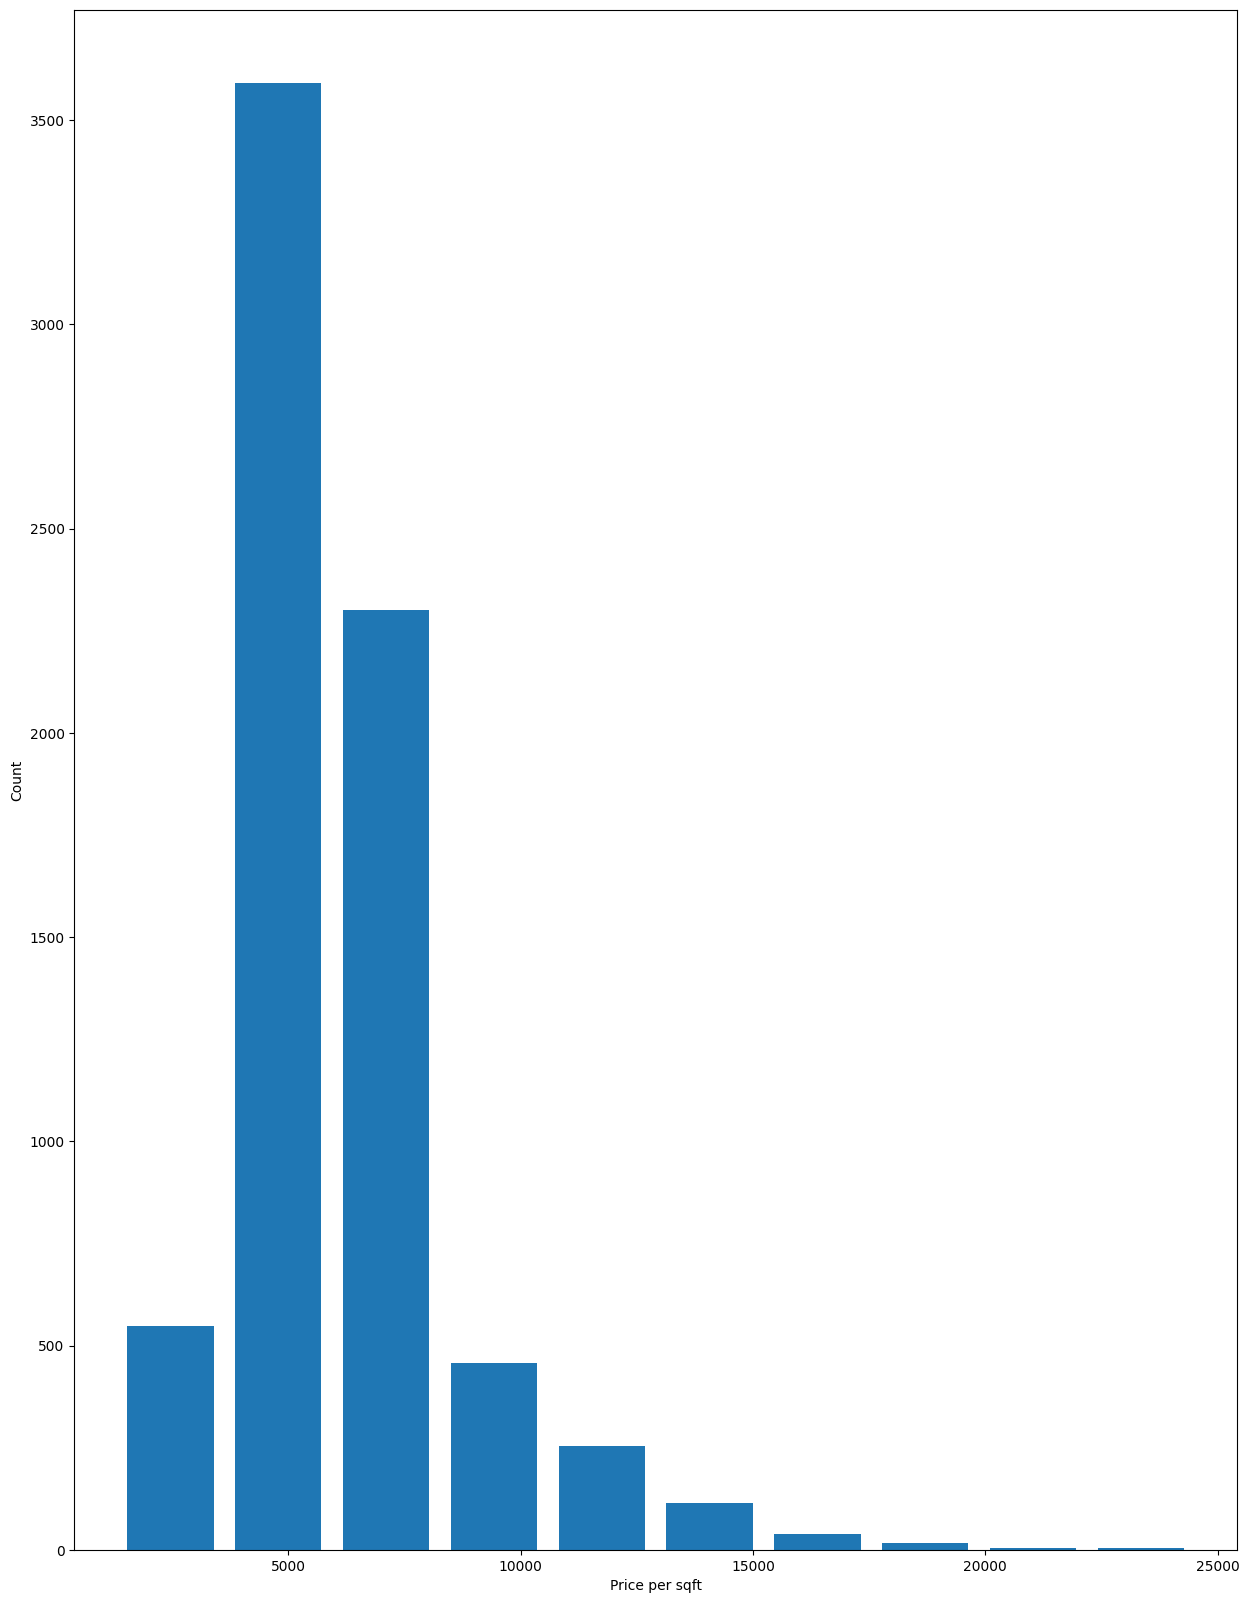

In [31]:
plt.hist(df7.price_per_sqft, rwidth=0.8)
plt.xlabel('Price per sqft')
plt.ylabel('Count')
plt.show()

In [32]:
df7[df7.bath>df7.bhk+2]

# Houses with 3 or more bathrooms than bhk

,location,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,1806.0,6.0,116.0,3,6423.034330
8411,other,11338.0,9.0,1000.0,6,8819.897689


In [33]:
df8 = df7[~(df7.bath > df7.bhk+2)]
df8
# Removing the houses with bathroom outliers

,location,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,1235.0,2.0,148.0,2,11983.805668
...,...,...,...,...,...,...
10232,other,1200.0,2.0,70.0,2,5833.333333
10233,other,1800.0,1.0,200.0,1,11111.111111
10236,other,1353.0,2.0,110.0,2,8130.081301
10237,other,812.0,1.0,26.0,1,3201.970443


In [34]:
df9 = df8.drop(columns=['price_per_sqft'])
df9.head()
# Removing unnecessary columns, for ML training

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [35]:
# Handle location data 
dummies = pd.get_dummies(df9.location)
dummies.head()
# Just the location data turned into Boolean(1 and 0)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [36]:
df10=pd.concat([df9.drop(columns='location'), dummies.drop(columns='other')], axis='columns')
df10

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,194.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.0,2.0,235.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1200.0,2.0,130.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1235.0,2.0,148.0,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10232,1200.0,2.0,70.0,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10233,1800.0,1.0,200.0,1,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10236,1353.0,2.0,110.0,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10237,812.0,1.0,26.0,1,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [37]:
df10.shape

(7325, 245)

In [38]:
X = df10.drop(columns='price')
X

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.0,2.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1200.0,2.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1235.0,2.0,2,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10232,1200.0,2.0,2,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10233,1800.0,1.0,1,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10236,1353.0,2.0,2,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10237,812.0,1.0,1,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [39]:
y = df10.price
y

0        428.0
1        194.0
2        235.0
3        130.0
4        148.0
         ...  
10232     70.0
10233    200.0
10236    110.0
10237     26.0
10240    400.0
Name: price, Length: 7325, dtype: float64

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=5)
cv = ShuffleSplit(n_splits=25, test_size=0.1, random_state=0)

lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)



cross_val_score(LinearRegression(), X, y, cv=cv).mean()

np.float64(0.8512340675316951)

In [41]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from  sklearn.tree import DecisionTreeRegressor

def find_best_model_grid_search_cv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'fit_intercept':[True, False],
                'positive': [True, False]
            }
        },
        'lasso' : {
            'model': Lasso(),
            'params': {
                'alpha':[1,2],
                'selection':['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['poisson', 'friedman_mse', 'squared_error', 'absolute_error'],
                'splitter': ['best', 'random']
            }
        }
    }
    
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False, error_score='raise')
        gs.fit(X,y)
        scores.append({
            'model':algo_name,
            'best_score':gs.best_score_,
            'best_params':gs.best_params_
        })
        
        
        
    return pd.DataFrame(scores)
    
    

find_best_model_grid_search_cv(X_train, y_train)

,model,best_score,best_params
0,linear_regression,0.822446,"{'fit_intercept': False, 'positive': False}"
1,lasso,0.689598,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.695237,"{'criterion': 'squared_error', 'splitter': 'ra..."


In [42]:
def predict_price(location, sqft, bath, bhk):
    loc_index = np.where(X.columns==location)[0][0]
    
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[3] = bhk
    
    if loc_index >= 0:
        x[loc_index] = True
        
    return lr.predict([x])[0]
    

In [43]:
predict_price('Rajaji Nagar', 1000, 2, 1)

c:\Users\Krish\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(321.0144279677504)

In [44]:
import pickle

with open('lr_model.pickle', 'wb') as f:
    pickle.dump(lr, f)

In [45]:
import json
columns = {
    'data_columns': [col.lower() for col in X.columns]
}

with open('columns.json', 'w') as f:
    f.write(json.dumps(columns))